In [2]:
%load_ext autoreload
%autoreload 2

from dlp.dataset import Dataset
from dlp.visualizer import Visualizer, SemanticVisualizer
from PIL import Image
from IPython.display import display
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

# Load dataset
ds = Dataset()
home_path = os.path.abspath(os.getcwd())
ds.load(home_path + '/data/DJI_0012')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pyplot Visualizer

In [3]:
# Instantiate the visualizer object
vis = Visualizer(ds)

## Plot scene

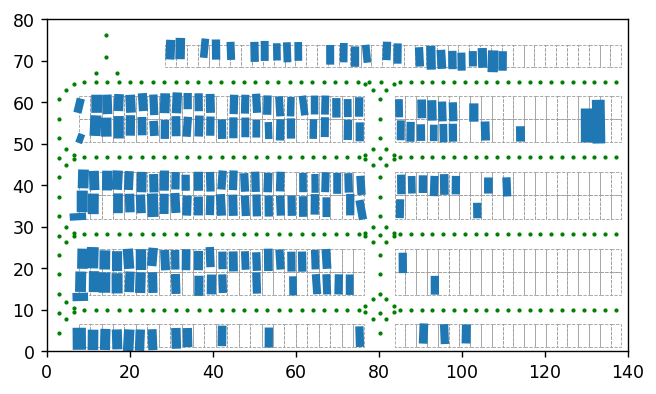

In [4]:
# Plot scene
ax = vis.plot_waypoints()
ax = vis.plot_scene(ds.list_scenes()[0], ax=ax)
plt.show()

## Plot the entire frame

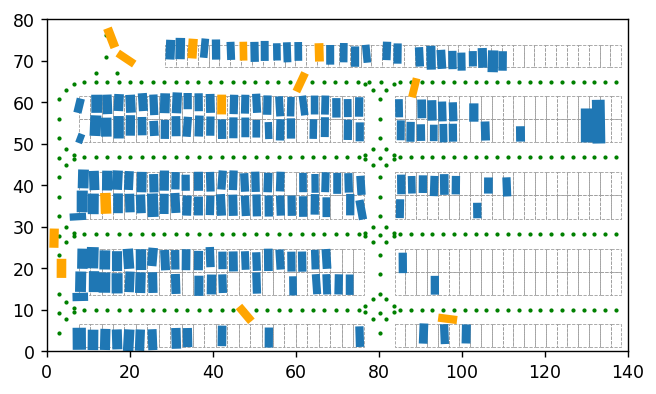

In [5]:
# Plot frame
scene = ds.get('scene', ds.list_scenes()[0])
ax = vis.plot_waypoints()
ax = vis.plot_frame(scene['first_frame'], ax=ax)
plt.show()

## Highlight the specified instance in this frame

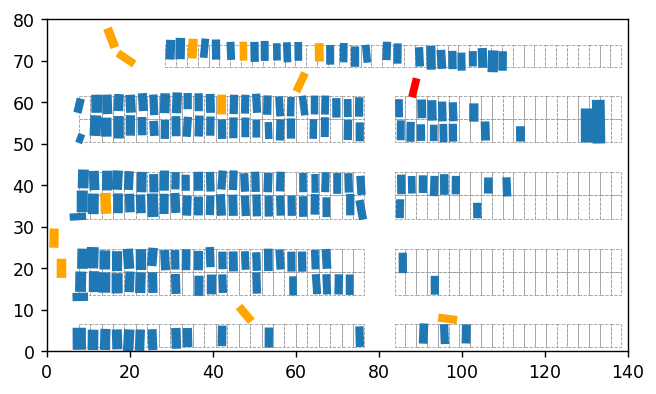

In [6]:
# Plot a certain instance
inst_to_highlight = ds.get_inst_at_location(scene['first_frame'], [90, 65])
ax = vis.highlight_instance(inst_to_highlight['instance_token'])
plt.show()

In [7]:
print(inst_to_highlight)

{'instance_token': '0a72735ac3b5f6f50bfa50ad8e91ac3e40277854', 'agent_token': 'a1b3619e3bc68c3de29af54ba9ff3de96c7de3dc', 'frame_token': '840d7356e46973280c5e71d628fc3b240bfd040a', 'coords': [88.55000000004657, 63.47999999998137], 'heading': 1.328607346410207, 'speed': 0.23, 'acceleration': [0.0056, 0.0089], 'mode': '', 'prev': '', 'next': '2e40de975f5ec83c4831c54f8cb58275785a3ea8'}


# Semantic Visualizer

In [8]:
smt_vis = SemanticVisualizer(ds, spot_margin=0.3, resolution=0.1, sensing_limit=20, steps=10, stride=10)

## Plot the entire frame

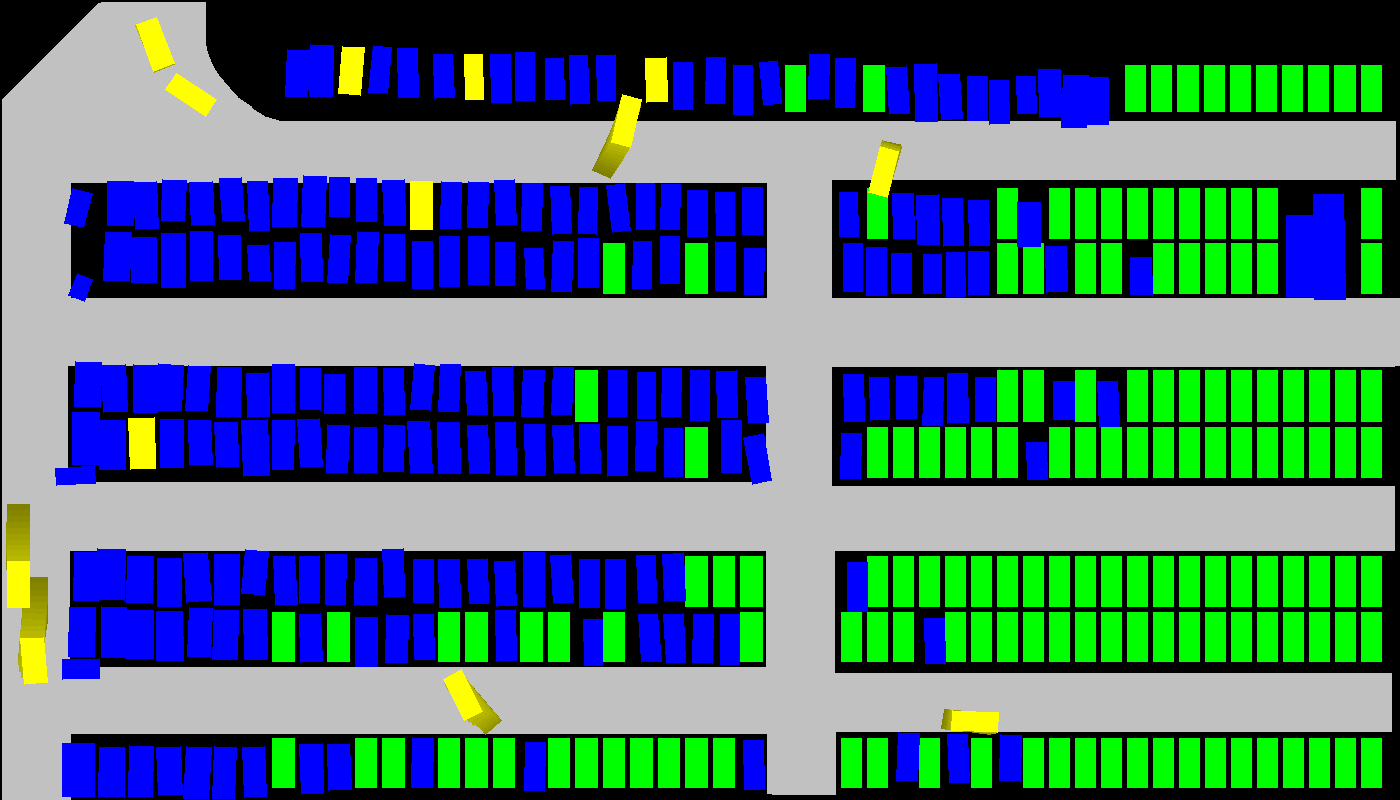

In [9]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=100)[-1]
# frame = ds.get('frame', scene['first_frame'])
img_frame = smt_vis.plot_frame(frame['frame_token'])
display(img_frame.transpose(Image.FLIP_TOP_BOTTOM))

## Plot the instance-centric crop

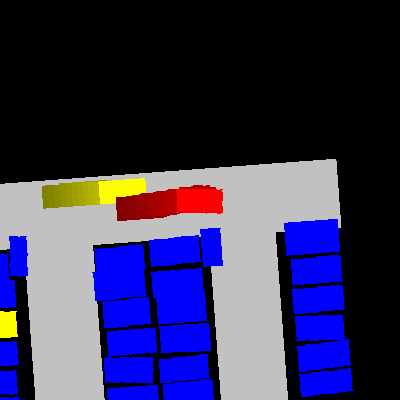

In [10]:
img = smt_vis.inst_centric(img_frame, frame['instances'][6])
display(img)

### Crop around a different center

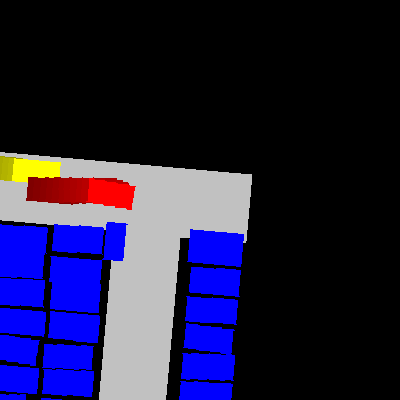

In [11]:
center_pose = np.array([3.27, 5, -1.65989265])
img = smt_vis.inst_centric(img_frame, frame['instances'][6], center_pose)
display(img)

## Future trajectory

In [12]:
traj = ds.get_future_traj(frame['instances'][6])
print(traj)

[[ 3.39       13.91       -1.49619265  1.58      ]
 [ 3.41       13.85       -1.48839265  1.59      ]
 [ 3.42       13.79       -1.48049265  1.59      ]
 ...
 [28.49        3.08       -1.55389265 -0.04      ]
 [28.49        3.08       -1.55379265 -0.04      ]
 [28.49        3.08       -1.55379265 -0.03      ]]


### Plot on to the instance centric view

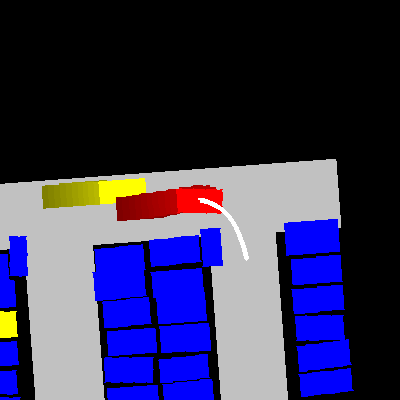

In [13]:
inst_token = frame['instances'][6]
instance = ds.get('instance', inst_token)
center_pose = np.array([instance['coords'][0], instance['coords'][1], instance['heading']])

img = smt_vis.inst_centric(img_frame, frame['instances'][6])
img = smt_vis.plot_traj(inst_centric_view=img, center_pose=center_pose, traj=traj[:100], color=(255,255,255), width=5)
display(img)